In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
!kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves

Dataset URL: https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.88G/3.89G [01:11<00:00, 32.8MB/s]
100% 3.89G/3.89G [01:11<00:00, 58.0MB/s]


In [ ]:
!unzip gravity-spy-gravitational-waves.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spect

In [ ]:
train_dir = 'train/train/'
validation_dir = 'validation/validation/'
test_dir = 'test/test/'

In [ ]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32,
                                                               shuffle=False)

Found 22348 files belonging to 22 classes.
Found 4800 files belonging to 22 classes.
Found 4720 files belonging to 22 classes.


In [ ]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


normalization_layer = layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='Conv1'),
        layers.MaxPooling2D((2, 2), name='MaxPool1'),

        layers.Conv2D(64, (3, 3), activation='relu', name='Conv2'),
        layers.MaxPooling2D((2, 2), name='MaxPool2'),

        layers.Conv2D(128, (3, 3), activation='relu', name='Conv3'),
        layers.MaxPooling2D((2, 2), name='MaxPool3'),

        layers.Flatten(name='Flatten'),
        layers.Dense(128, activation='relu', name='Dense1'),
        layers.Dropout(0.5, name='Dropout'),
        layers.Dense(num_classes, activation='softmax', name='Output')
    ])
    return model

for images, labels in train_data.take(1):
    input_shape = images.shape[1:]  # (224, 224, 3)
    num_classes = labels.shape[-1]  # Number of classes

cnn_model = create_cnn_model(input_shape, num_classes)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool1 (MaxPooling2D)              │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2 (MaxPooling2D)              │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool3 (MaxPooling2D)              │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 22)                  │           2,838 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,171,798 (42.62 MB)

 Trainable params: 11,171,798 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 10
history = cnn_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=EPOCHS
)

Epoch 1/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 207s 284ms/step - accuracy: 0.6602 - loss: 1.2607 - val_accuracy: 0.9196 - val_loss: 0.2914
Epoch 2/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 191s 273ms/step - accuracy: 0.9001 - loss: 0.3519 - val_accuracy: 0.9362 - val_loss: 0.2338
Epoch 3/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 199s 269ms/step - accuracy: 0.9267 - loss: 0.2465 - val_accuracy: 0.9321 - val_loss: 0.2569
Epoch 4/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 188s 250ms/step - accuracy: 0.9433 - loss: 0.1867 - val_accuracy: 0.9421 - val_loss: 0.2249
Epoch 5/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 204s 252ms/step - accuracy: 0.9522 - loss: 0.1594 - val_accuracy: 0.9346 - val_loss: 0.2653
Epoch 6/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 214s 269ms/step - accuracy: 0.9598 - loss: 0.1379 - val_accuracy: 0.9388 - val_loss: 0.3043
Epoch 7/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 189s 271ms/step - accuracy: 0.9667 - loss: 0.1098 - val_accuracy: 0.9467 - val_loss: 0.2451
Epoch 8/10
699/699 ━━━━━━━━━━━━━━━━━━━━ 176s 252ms/step - accuracy: 0.9718 -

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 210ms/step - accuracy: 0.9639 - loss: 0.3204
Test Accuracy: 0.95


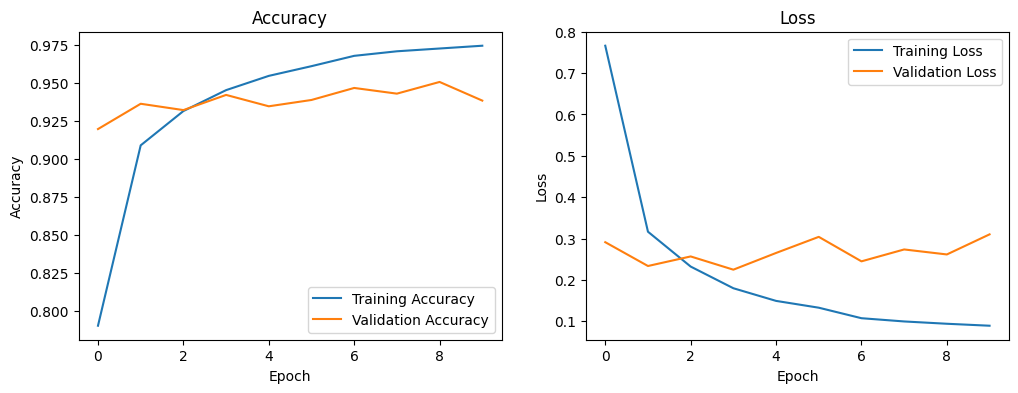

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
pred_prob = cnn_model.predict(test_data, verbose=1)
pred_prob[:5]

148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 189ms/step


array([[8.82936060e-01, 1.16020803e-15, 6.68131861e-06, 1.11582792e-10,
        6.31779429e-15, 2.74499919e-11, 1.06868153e-10, 7.61241276e-13,
        6.71137668e-12, 1.72620772e-11, 5.25816044e-13, 2.25410535e-08,
        1.82556869e-05, 4.88460591e-06, 1.79092626e-11, 1.27810607e-09,
        7.13463232e-04, 1.48804674e-19, 6.83886671e-12, 1.16227500e-01,
        6.83183362e-06, 8.65613256e-05],
       [9.96924937e-01, 7.60252524e-20, 3.22383031e-09, 7.56884084e-13,
        3.37785304e-18, 1.05516304e-13, 2.80265421e-13, 6.17948143e-15,
        4.25197072e-15, 2.80422471e-14, 1.54931642e-18, 3.39657691e-10,
        2.89174729e-09, 1.85001667e-08, 1.85063125e-15, 1.75092319e-11,
        1.18301116e-07, 1.35429132e-23, 3.55525732e-15, 3.06364405e-03,
        1.06047773e-05, 6.87408203e-07],
       [9.99999046e-01, 1.21294560e-18, 8.14764749e-12, 3.13382052e-15,
        7.77222587e-20, 2.90957639e-15, 4.18234485e-13, 9.95773256e-17,
        7.28678820e-17, 1.14568823e-13, 1.13252884e-16

In [ ]:
pred_class = pred_prob.argmax(axis=1)
pred_class[-10:], pred_class.shape

(array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21]), (4720,))

In [ ]:
true_class = []
for images, labels in test_data.unbatch():
    true_class.append(labels.numpy().argmax())
true_class[-10:], len(true_class)

([21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 4720)

In [ ]:
# sklearn accuracy (should be equal to tensorflow evaluation)
from sklearn.metrics import accuracy_score
sklearn_score = accuracy_score(true_class, pred_class)
sklearn_score

0.948093220338983

In [ ]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32,
                                                               shuffle=False)

Found 22348 files belonging to 22 classes.
Found 4800 files belonging to 22 classes.
Found 4720 files belonging to 22 classes.


In [ ]:
class_names = train_data.class_names
class_names[:]

['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

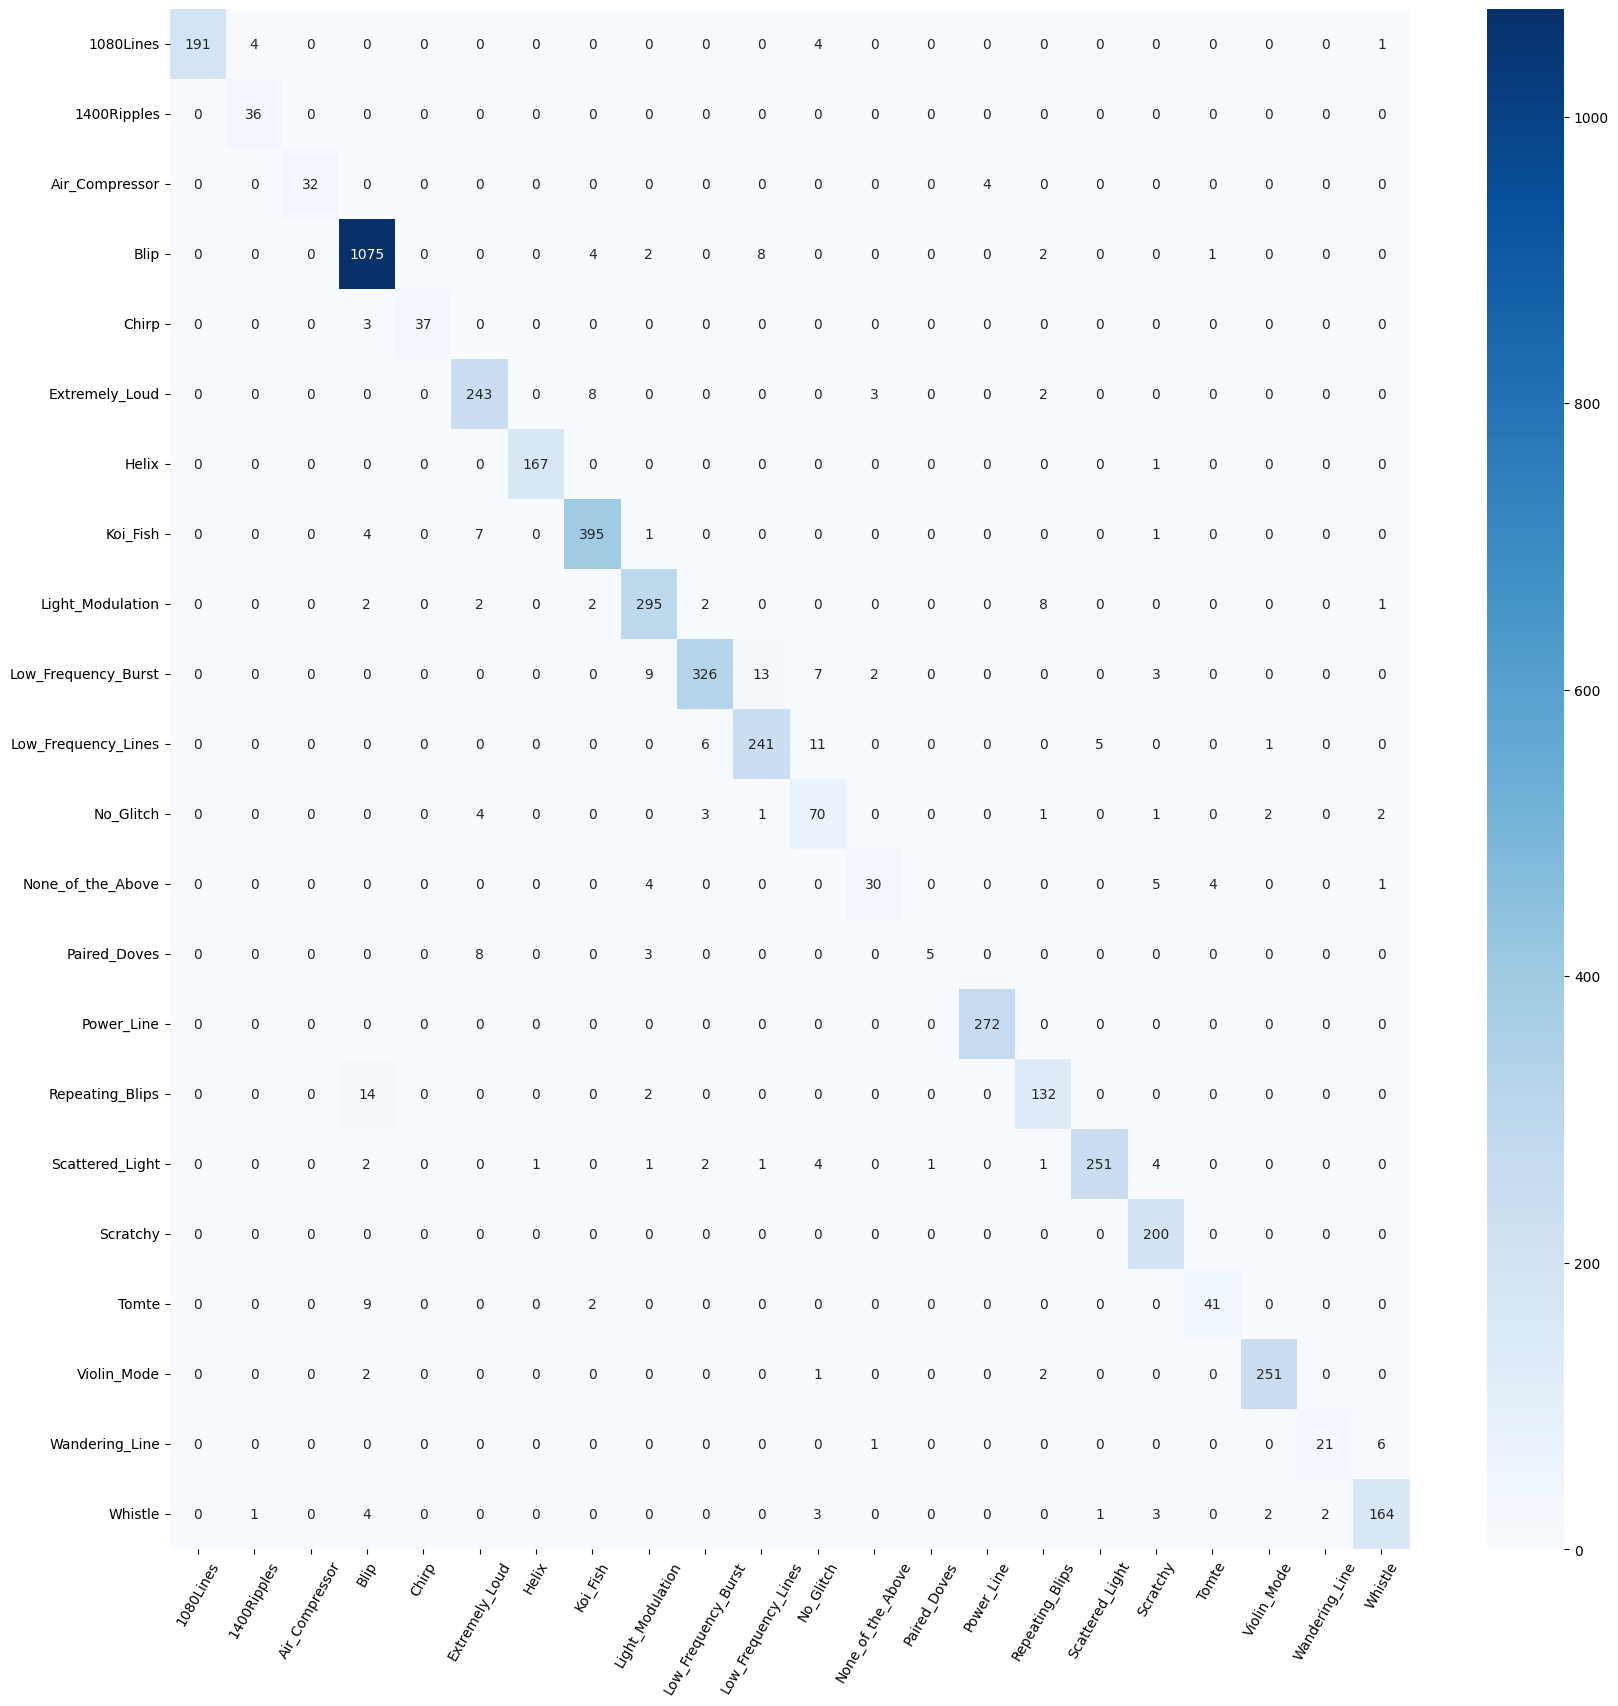

In [ ]:
# Create the confusion matrix
from tensorflow.math import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(true_class, pred_class)

plt.figure(figsize=(20, 20))

x_labels = class_names
y_labels = class_names
sns.heatmap(conf_mat,
           cmap="Blues",
           fmt="",
           annot=True,
           xticklabels=x_labels,
            yticklabels=y_labels
           )
plt.xticks(rotation=60);

In [ ]:
# Get the classification report
from sklearn.metrics import classification_report

class_report = classification_report(true_class, pred_class)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       200
           1       0.88      1.00      0.94        36
           2       1.00      0.89      0.94        36
           3       0.96      0.98      0.97      1092
           4       1.00      0.93      0.96        40
           5       0.92      0.95      0.93       256
           6       0.99      0.99      0.99       168
           7       0.96      0.97      0.96       408
           8       0.93      0.95      0.94       312
           9       0.96      0.91      0.93       360
          10       0.91      0.91      0.91       264
          11       0.70      0.83      0.76        84
          12       0.83      0.68      0.75        44
          13       0.83      0.31      0.45        16
          14       0.99      1.00      0.99       272
          15       0.89      0.89      0.89       148
          16       0.98      0.94      0.96       268
          17       0.92    

In [ ]:
import pandas as pd
# Get the class-wise f1 score
class_report_dict = classification_report(true_class, pred_class, output_dict=True)

# Create a pandas DataFrame with class names and f1 scores
class_f1_dict = {}
for k, v in class_report_dict.items():
    if k == "accuracy":
        break
    class_f1_dict[class_names[int(k)]] = v['f1-score']
df_f1_score = pd.DataFrame({"class_name": list(class_f1_dict.keys()),
                           "f1_score": list(class_f1_dict.values())}).sort_values("f1_score", ascending=False)
df_f1_score

,class_name,f1_score
6,Helix,0.994048
14,Power_Line,0.992701
19,Violin_Mode,0.980469
0,1080Lines,0.976982
3,Blip,0.974173
7,Koi_Fish,0.964591
4,Chirp,0.961039
17,Scratchy,0.956938
16,Scattered_Light,0.956190
2,Air_Compressor,0.941176


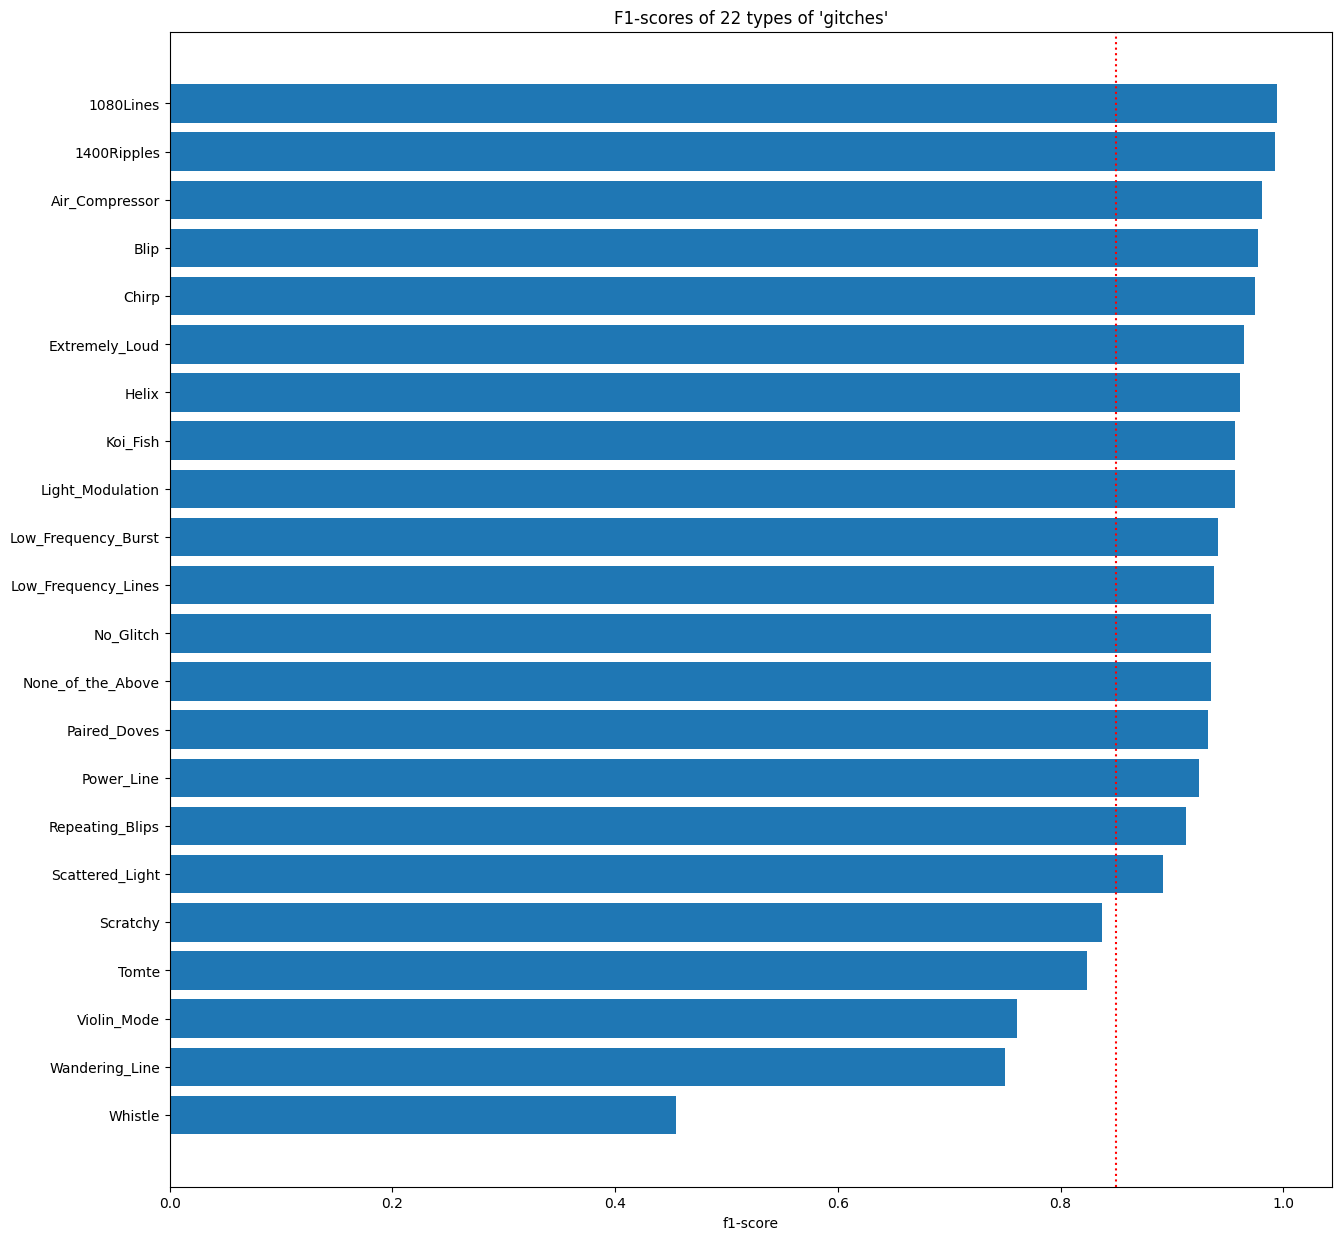

In [ ]:
# Plot the horizontal bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
scores = ax.barh(range(len(df_f1_score)), df_f1_score["f1_score"])
ax.set_yticks(range(len(df_f1_score)))
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-scores of 22 types of 'gitches'")
plt.axvline(x=0.85, ls='dotted', c='r')
ax.invert_yaxis();

In [ ]:
# Prepare images to load into the model

def prep_testimgs(filename,
                 img_shape=224,
                 scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img[:, :, :3] # Converting the image size from (224, 224, 4) due to alpha channel to (224, 224, 3).
    # From here: (https://stackoverflow.com/questions/35902302/discarding-alpha-channel-from-images-stored-as-numpy-arrays)
    if scale:
        return img/255.
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


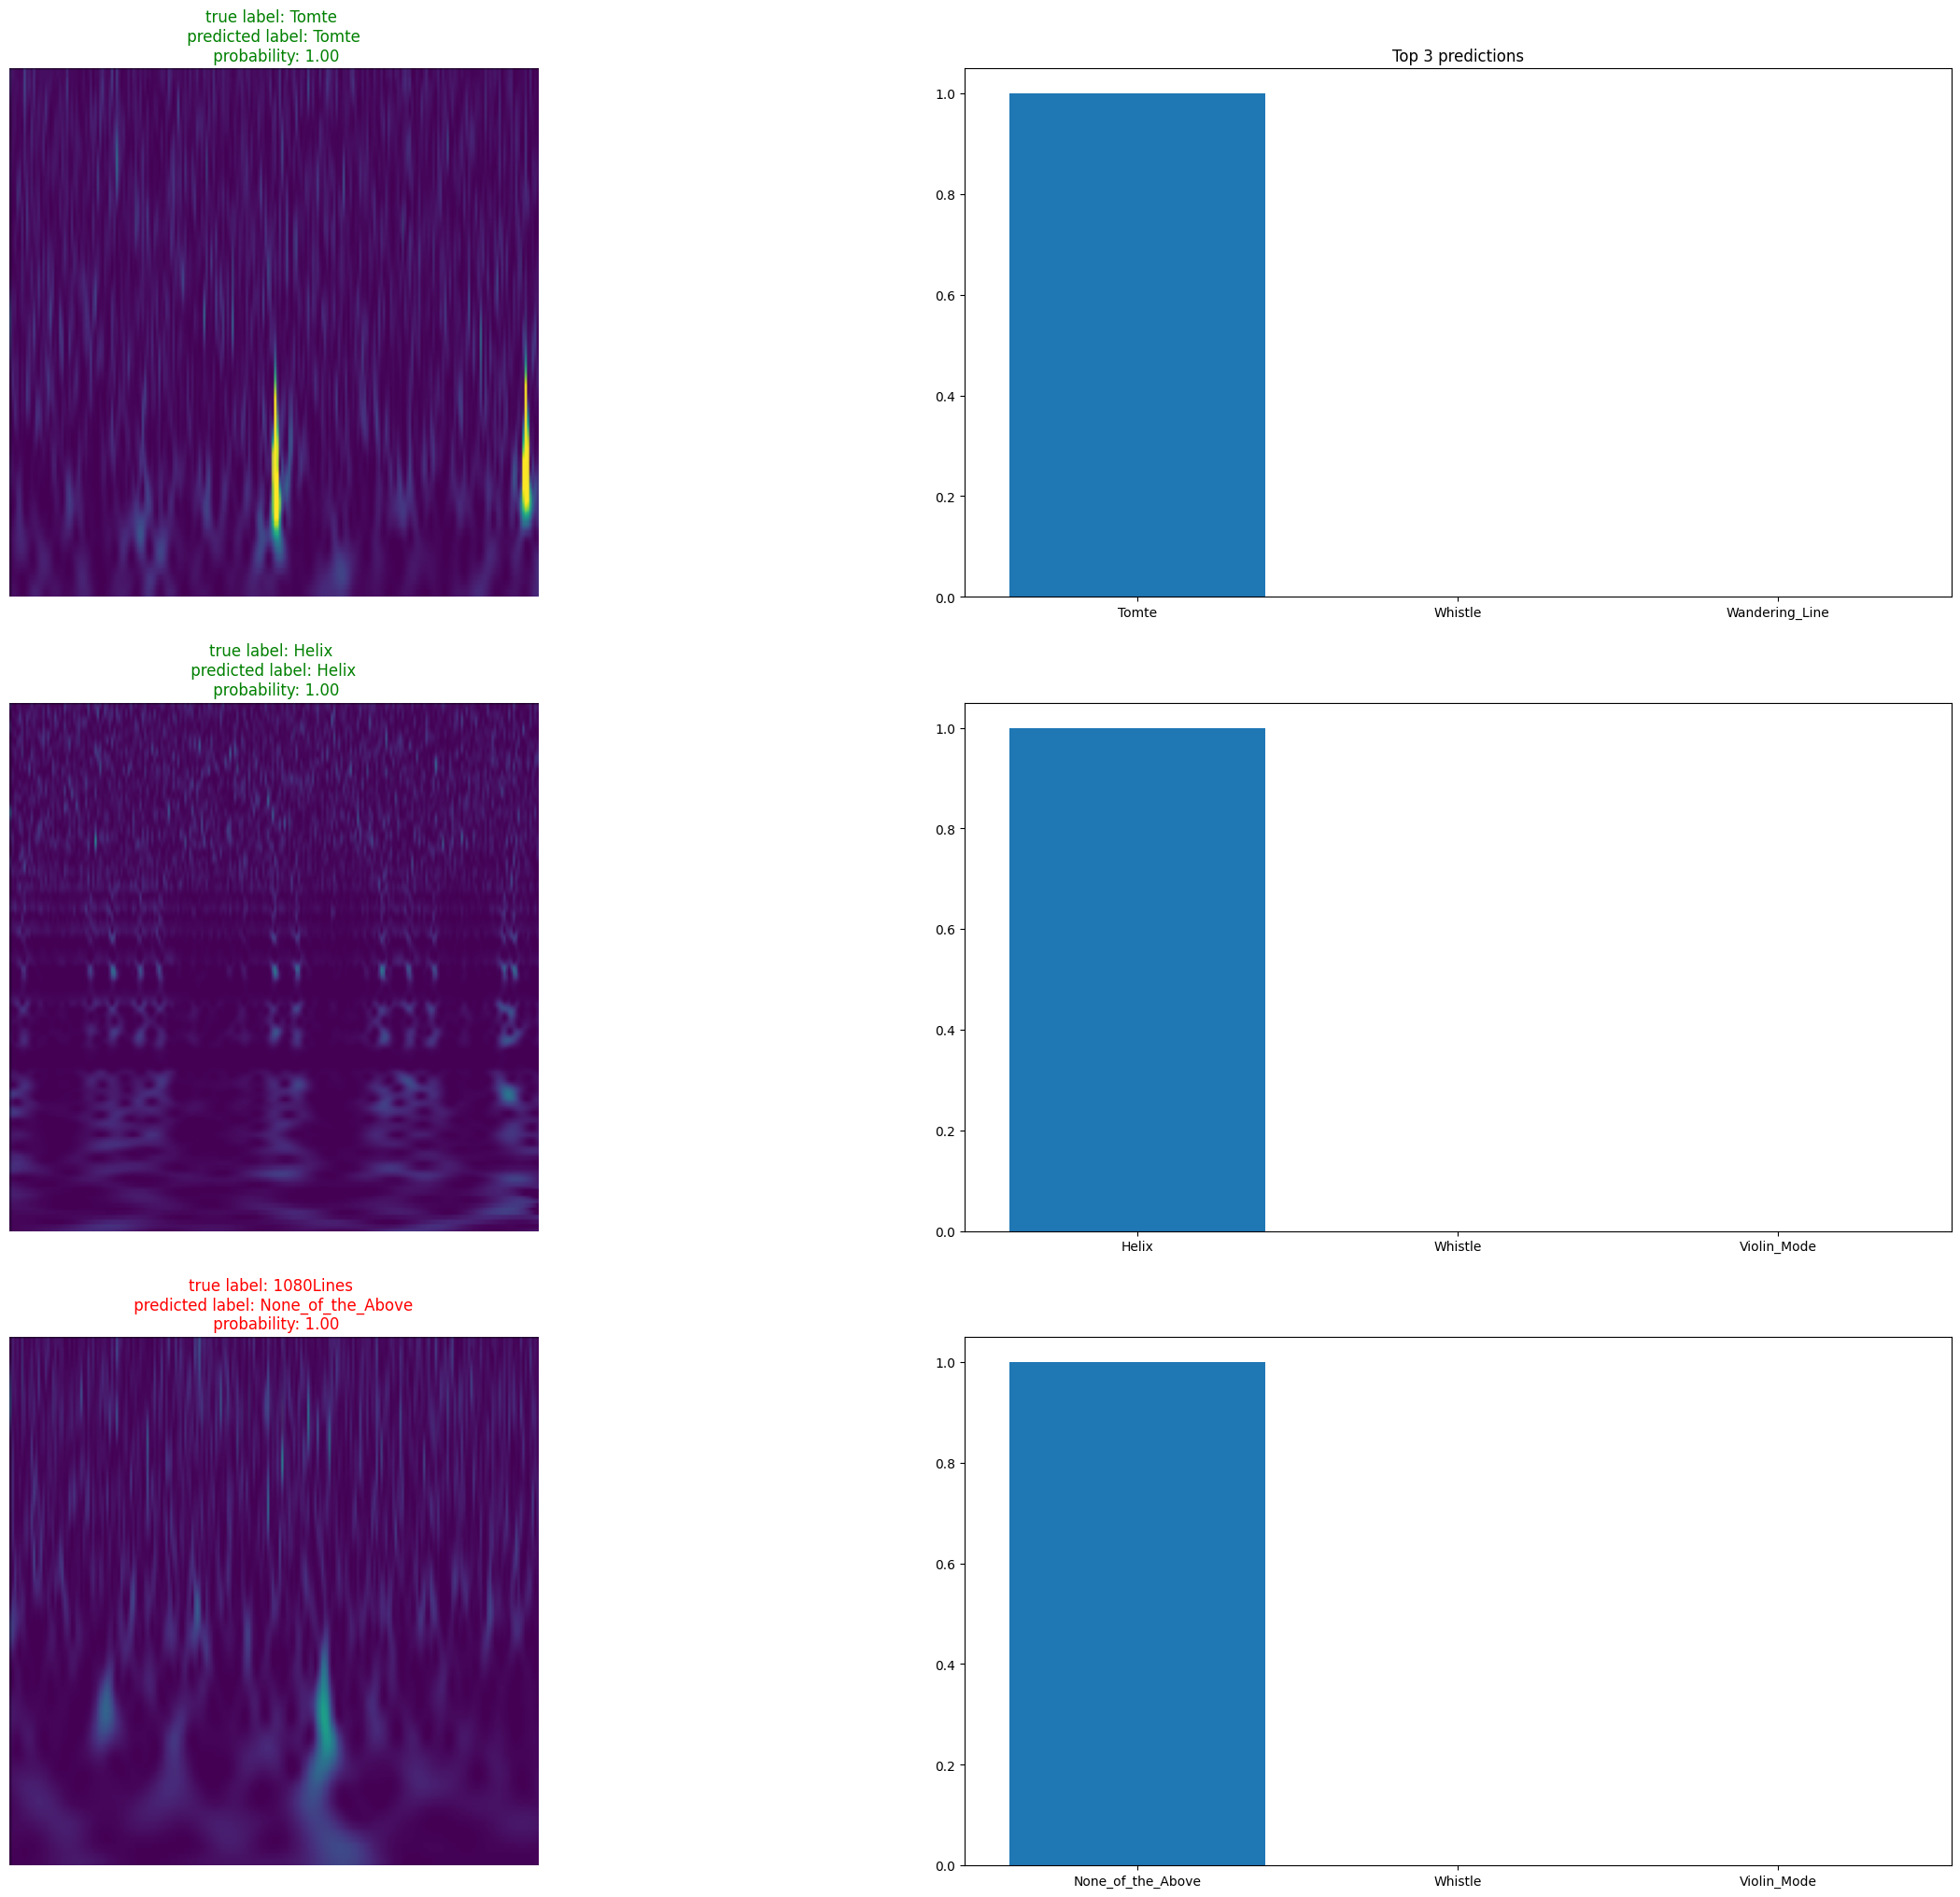

In [ ]:
import os
import random

num_plots = 3
fig, axs = plt.subplots(num_plots, 2, figsize=(30, 25))
for i in range(num_plots):

    # Get the random image file path
    random_class_name = random.choice(class_names)
    random_file = random.choice(os.listdir(test_dir + "/" + random_class_name))
    filepath = test_dir + random_class_name + "/" + random_file

    # Image preprocessing before it is fed inside model for prediction
    # Remember the model already has image rescaling layer built in so we don't need to rescale it
    img = tf.io.read_file(filepath)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [224, 224])
    img = img[:, :, :3]
    img = tf.expand_dims(img, axis=0)

    # Predict the image using the model we built
    pred_prob_image = cnn_model.predict(img)
    pred_class_image = class_names[pred_prob_image.argmax()]

    top_3_pred_prob_idx = (pred_prob_image.argsort())[0][-3:][::-1]
    top_3_pred_prob = [pred_prob_image[0][idx1] for idx1 in top_3_pred_prob_idx]
    top_3_pred_class = [class_names[idx2] for idx2 in top_3_pred_prob_idx]

    # Plot the figure
    # We need to remove that extra dimension related to the batch and divide the pixels by 255. for imshow() function
    axs[i, 0].imshow(tf.squeeze(img/255.))
    if random_class_name == pred_class_image:
        title_color = 'g'
    else:
        title_color = 'r'
    axs[i, 0].set_title(f"true label: {random_class_name} \n predicted label: {pred_class_image} \n probability: {pred_prob_image.max():.2f}",
                     c=title_color)
    axs[i, 0].axis(False)

    axs[0, 1].set_title("Top 3 predictions")
    axs[i, 1].bar(top_3_pred_class, top_3_pred_prob);